# Importing Necessary Packges
Importing the libraries required to manipulate and make sense of our data

In [1]:
import sklearn
import warnings
%matplotlib inline
import numpy as np 
import pandas as pd
import seaborn as sns
from astropy.table import Table 
from sklearn import svm, metrics
from matplotlib import pyplot as plt
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix  

# Reading in Data

Using the data files split in the previous notebook, we will read in the following datasets and concatenate them using Pandas.

##### Datasets utilized:
- group20_train.csv
- group20_cv.csv

In [2]:
#warnings.simplefilter('ignore')
training = pd.read_csv("group20_train.csv") #training portion of the data
cv = pd.read_csv("group20_cv.csv") # CV portion of the data

frames = [training, cv]

trainData = pd.concat(frames)
trainData.shape
trainData.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7


# Seperating the Input and Output variables
Assigning the Input and Output to X and y, respectively for our training set

In [3]:
m = trainData.shape[0]
n = trainData.shape[1]-1

X_train = trainData.drop(['784'], axis=1)
y_train = trainData['784'] 

# Feature Scaling


We will be Scaling our features using the sklearn library. 


In [4]:
scaler = StandardScaler()  
scaler.fit(X_train)
X_trainScaled = scaler.transform(X_train)  

display(pd.DataFrame(X_trainScaled).head())
X_trainScaled.shape

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032426,-0.025831,-0.019102,-0.018481,-0.018394,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032426,-0.025831,-0.019102,-0.018481,-0.018394,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032426,-0.025831,-0.019102,-0.018481,-0.018394,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032426,-0.025831,-0.019102,-0.018481,-0.018394,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032426,-0.025831,-0.019102,-0.018481,-0.018394,0.0,0.0,0.0,0.0,0.0


(8000, 784)

# Model Training

Using the MLPClassifier from sklearn
We initialize it with a random node size

In [5]:
mlp = MLPClassifier(hidden_layer_sizes=(250,), max_iter=1000, alpha=0.001, solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.2, activation = 'logistic',)
mlp.fit(X_trainScaled, y_train.values.ravel())  
print("Training set score: %f" % mlp.score(X_trainScaled, y_train))
print("Training set loss: %f" % mlp.loss_)

Iteration 1, loss = 0.78489161
Iteration 2, loss = 0.26249253
Iteration 3, loss = 0.19808736
Iteration 4, loss = 0.15962997
Iteration 5, loss = 0.12860646
Iteration 6, loss = 0.10694844
Iteration 7, loss = 0.08736076
Iteration 8, loss = 0.07266880
Iteration 9, loss = 0.06002007
Iteration 10, loss = 0.04872699
Iteration 11, loss = 0.04125298
Iteration 12, loss = 0.03510400
Iteration 13, loss = 0.03041467
Iteration 14, loss = 0.02562177
Iteration 15, loss = 0.02171004
Iteration 16, loss = 0.01929073
Iteration 17, loss = 0.01702838
Iteration 18, loss = 0.01520824
Iteration 19, loss = 0.01364352
Iteration 20, loss = 0.01254811
Iteration 21, loss = 0.01141689
Iteration 22, loss = 0.01058697
Iteration 23, loss = 0.00980420
Iteration 24, loss = 0.00914272
Iteration 25, loss = 0.00865563
Iteration 26, loss = 0.00818701
Iteration 27, loss = 0.00775782
Iteration 28, loss = 0.00735126
Iteration 29, loss = 0.00707131
Iteration 30, loss = 0.00677832
Iteration 31, loss = 0.00658478
Iteration 32, los

# Model Evaluation

## Creating a Table 

Creating a table to visualise the effect of Node count on the CV Accuracy

In [7]:
CVTable = Table(names=["Accuracy", "Node Count"])

## Brute-Force Search
Iterating through varying Node counts and calculating the CV Accuracy per Node count


In [8]:
nodes_size = [5,10,20,30,50,75,90,120,150,200,250] #The number of hidden nodes in layer

for ns in nodes_size:   
    mlp = MLPClassifier(hidden_layer_sizes=(ns,), max_iter=1000, solver='adam', tol=1e-4)
    scores = cross_val_score(mlp, X_trainScaled, y_train,cv=5 )
    AccuracyCV = (scores.mean(), scores.std() * 2)
    print("Accuracy is {}% for {}".format(AccuracyCV, ns))
    CVTable.add_row ([scores.mean(), ns]) 

Accuracy is (0.7922636275665991, 0.0417944388888733)% for 5
Accuracy is (0.8854900187495142, 0.01681412150124789)% for 10
Accuracy is (0.9174936618793318, 0.011934353176005705)% for 20
Accuracy is (0.9282470429820628, 0.007248476963596176)% for 30
Accuracy is (0.9367489370192633, 0.006133328581415469)% for 50
Accuracy is (0.9378709677618842, 0.012017303360683889)% for 75
Accuracy is (0.9386236272480379, 0.0030012136341727204)% for 90
Accuracy is (0.9431223899253519, 0.013032707599726568)% for 120
Accuracy is (0.9433729308001674, 0.00972255810979768)% for 150
Accuracy is (0.942748403555008, 0.00879225344303316)% for 200
Accuracy is (0.9433722297723175, 0.005396635394222743)% for 250


Accuracy Node Count
-------- ----------
  0.7923        5.0
  0.8855       10.0
  0.9175       20.0
  0.9282       30.0
  0.9367       50.0
  0.9379       75.0
  0.9386       90.0
  0.9431      120.0
  0.9434      150.0
  0.9427      200.0
  0.9434      250.0


name = Accuracy
mean = 0.9190321670235942
std = 0.043341077576569575
min = 0.7922636275665991
max = 0.9433729308001674
n_bad = 0
length = 11


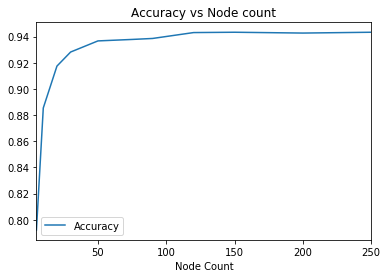

In [9]:
CVTable['Accuracy'].format = "%6.4f"
print(CVTable)
print("\n")
CVTable['Accuracy'].info('stats')

df = CVTable.to_pandas()
ax = plt.gca()
df.plot(kind='line',x='Node Count',y='Accuracy',ax=ax, title='Accuracy vs Node count')

#### Conclusion
Since there is little to no increase after 90 Nodes, we will set the Node size to 90

# Model Testing

## Reading in our testing data
Reading in and splitting our testing data. Then proceding to scale it.

In [10]:
test = pd.read_csv("group20_test.csv")
m = test.shape[0]
n = test.shape[1]-1
X_test = test.drop(['784'], axis=1)
y_test = test['784'] 
X_test = scaler.transform(X_test) 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(90,), max_iter=1000, solver='adam', tol=1e-4)
mlp.fit(X_trainScaled, y_train.values.ravel())
predictions = mlp.predict(X_test)  

# Evaluating the Accuracy of our model after testing
Below is the confusion matrix for the data as well as the classification report

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       199
           1       0.95      0.95      0.95       219
           2       0.95      0.93      0.94       215
           3       0.95      0.91      0.93       210
           4       0.95      0.91      0.93       216
           5       0.92      0.95      0.94       199
           6       0.96      0.97      0.96       181
           7       0.94      0.95      0.95       184
           8       0.93      0.89      0.91       207
           9       0.87      0.94      0.90       170

   micro avg       0.94      0.94      0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



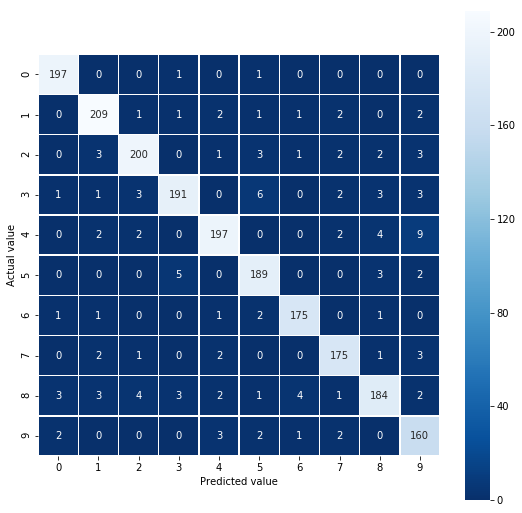

In [12]:
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
print(classification_report(y_test,predictions))

In [13]:
Recall =np.diag(cm) / np.sum(cm,axis=1) 
Recall = (np.mean(Recall))*100
print("Precision = ", str(Recall))

Precision =  93.93832941434216


# Exporting the Model

In [23]:
joblib.dump(mlp, 'NN.joblib') 

['NN.joblib']